## Load Datasets

In [1]:
TRAIN_PATH = "Dataset/Train"
VAL_PATH = "Dataset/Val"

## Importing Required Libraries

In [2]:
import pandas as pd
import shutil
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

## Building Architecture


In [4]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),
                 activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

## Data Augmentation

In [6]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)


In [7]:
train_generator = train_datagen.flow_from_directory(
    'Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [8]:
validation_generator = test_dataset.flow_from_directory(
    'Dataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

## Model Fitting

In [10]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

C:\Users\karth\AppData\Local\Temp\ipykernel_15216\430255416.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10


8/8 [==============================] - 34s 4s/step - loss: 0.8934 - accuracy: 0.5117 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 24s 3s/step - loss: 0.6803 - accuracy: 0.5742 - val_loss: 0.6792 - val_accuracy: 0.8833
Epoch 3/10
8/8 [==============================] - 25s 3s/step - loss: 0.6026 - accuracy: 0.6836 - val_loss: 0.5541 - val_accuracy: 0.9333
Epoch 4/10
8/8 [==============================] - 26s 3s/step - loss: 0.3912 - accuracy: 0.8281 - val_loss: 0.2298 - val_accuracy: 0.9333
Epoch 5/10
8/8 [==============================] - 24s 3s/step - loss: 0.2001 - accuracy: 0.9141 - val_loss: 0.1508 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 23s 3s/step - loss: 0.1498 - accuracy: 0.9414 - val_loss: 0.1760 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 25s 3s/step - loss: 0.1436 - accuracy: 0.9531 - val_loss: 0.1053 - val_accuracy: 0.9500
Epoch 8/10
8/8 [================

Loss is very less and accuracy is high

In [11]:
model.save("Covid_19_Detection.h5")

C:\Users\karth\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
model.evaluate_generator(train_generator)

C:\Users\karth\AppData\Local\Temp\ipykernel_15216\326654268.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.10201800614595413, 0.9652777910232544]

In [13]:
model.evaluate_generator(validation_generator)

C:\Users\karth\AppData\Local\Temp\ipykernel_15216\3378472596.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.08802405744791031, 0.949999988079071]

In [14]:
model = load_model("Covid_19_Detection.h5")

In [15]:
y_actual = []
y_test = []

In [16]:
import os
import keras.utils as image

In [17]:
for i in os.listdir("Dataset/val/Normal"):
  img = image.load_img("Dataset/val/Normal/"+i,
                       target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)

1/1 [==============================] - 0s 45ms/step


In [18]:
for i in os.listdir("Dataset/Val/Covid"):
  img = image.load_img("Dataset/Val/Covid/"+i,
                       target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

1/1 [==============================] - 0s 283ms/step


In [19]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

## Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [21]:

threshold = 0.5  # Adjust the threshold as needed
y_pred_binary = [1 if p >= threshold else 0 for p in y_test]
cm = confusion_matrix(y_actual, y_pred_binary)

In [22]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False, # Set to True to obtain normalized values
                          title='Confusion matrix',
                          cmap="PuRd"):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

Confusion matrix, without normalization


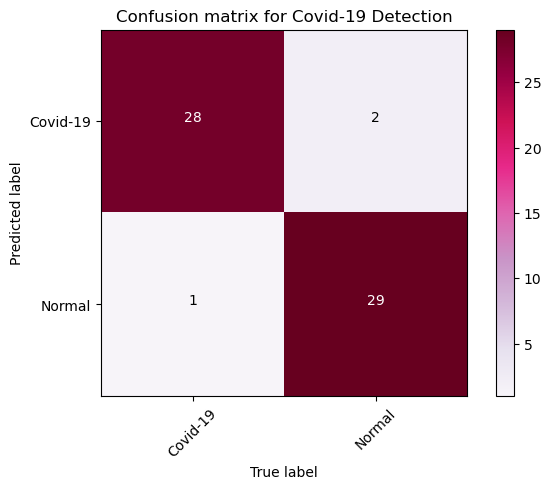

In [23]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="PuRd")


## Model Accuracy and Loss

In [24]:
history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


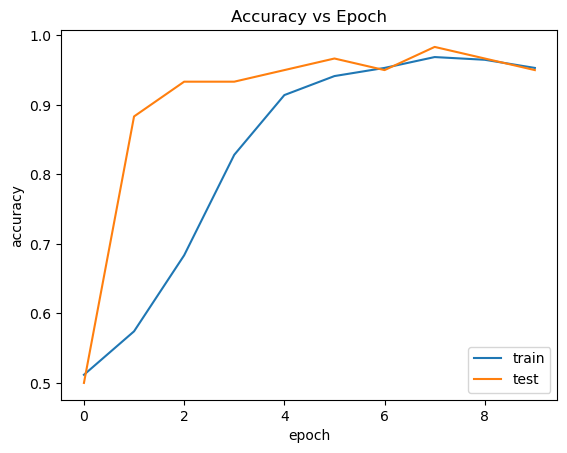

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## Model loss

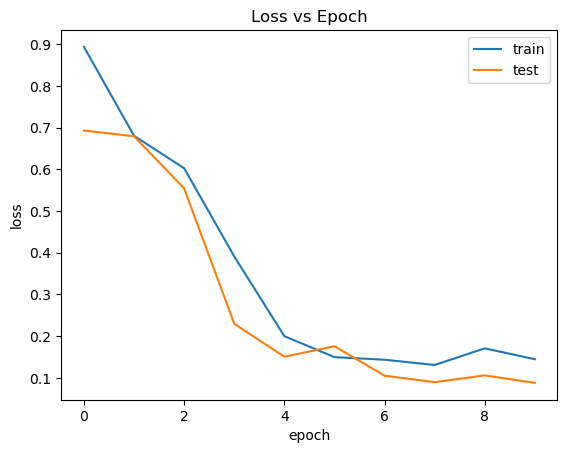

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Predictions from X-Ray Images

In [27]:
import numpy as np
import cv2
import keras.utils as image

1/1 [==============================] - 0s 44ms/step
This Xray Image is of Covid-19 positive patient
Prediction Of Our Model :  Positive For Covid-19


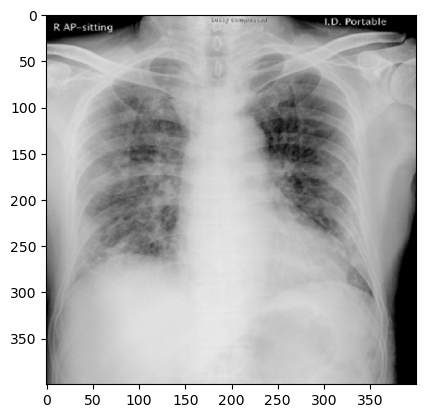

In [28]:
# Trial with already result known X-Ray image
xtest_image = image.load_img('Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
imggg = cv2.imread('Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg')
print("This Xray Image is of Covid-19 positive patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

1/1 [==============================] - 0s 50ms/step
This Xray Image is of Covid-19 Negative patient
Prediction Of Our Model :  Negative for Covid-19


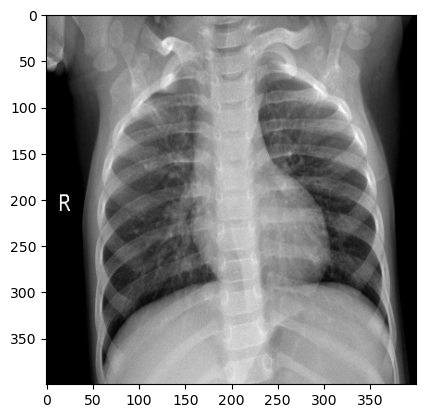

In [29]:
xtest_image = image.load_img('Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
imggg = cv2.imread('Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg')
print("This Xray Image is of Covid-19 Negative patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

In [30]:
def predict_from_image(img_path):
  xtest_image = image.load_img(img_path,target_size = (224, 224))
  xtest_image = image.img_to_array(xtest_image)
  xtest_image = np.expand_dims(xtest_image, axis = 0)
  results = model.predict(xtest_image)
  show = cv2.imread(img_path)
  show = np.array(show)
  show = cv2.resize(show,(400,400))
  plt.imshow(show)
  if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
  else:
    prediction = 'Negative for Covid-19'
  print("Prediction Of Our Model : ",prediction)

Enter path for chest X-Ray image: Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg
1/1 [==============================] - 0s 47ms/step
Prediction Of Our Model :  Negative for Covid-19


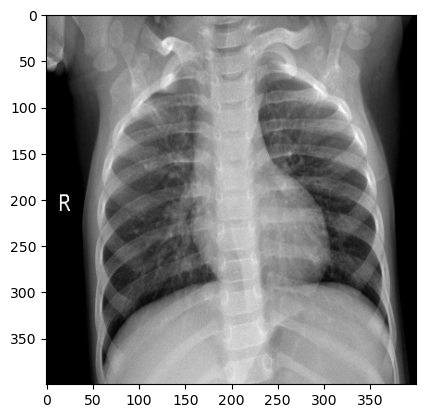

In [31]:
image_path = input("Enter path for chest X-Ray image: ")
predict_from_image(image_path)